In [1]:
from __future__ import division
from time import time
import sqlite3, pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
def hide_spines():
    """Hides the top and rightmost axis spines from view for all active
    figures and their respective axes."""

    # Retrieve a list of all current figures.
    figures = [x for x in matplotlib._pylab_helpers.Gcf.get_all_fig_managers()]
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            # Disable spines.
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')
            ax.spines['left'].set_color('none')
            ax.spines['bottom'].set_color('none')
            # Disable ticks.
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')

In [2]:
sqlitefile = '/media/jeroen/886E244A6E24337C/Users/jeroe/Documents/reddit statistics/reddit.sqlite'

<hr>

# Get start & end date of dataset, and number of subreddits

In [45]:
conn = sqlite3.connect(sqlitefile)
c = conn.cursor()
c.execute('''SELECT MIN(created_UTC), MAX(created_UTC), COUNT(DISTINCT subreddit) FROM submissions;''')
rows = c.fetchall()
conn.close()
print rows

[(1138126222, 1441054814, 430434)]


# Get timeline per subreddit

In [3]:
def getRows(start, end):
    conn = sqlite3.connect(sqlitefile)
    c = conn.cursor()
    c.execute('''SELECT subreddit, created_utc FROM submissions WHERE rowid BETWEEN '''+str(start)+''' AND '''+str(end)+''';''')
    rows = c.fetchall()
    conn.close()
    return rows

In [4]:
%%time
data = np.zeros((430434,3507), dtype=np.uint16)
subreddits = {}
steps = int(196.5 / 0.5)
counter = 0
lasttime = time()
for s in range(0,steps):
    start = s*5e5+1
    stop = s*5e5+5e5
    rows = getRows(start,stop)
    for r in rows:
        # find subreddit index
        try:
            subreddit = subreddits[r[0]]
        except KeyError:
            subreddit = counter
            subreddits[r[0]] = subreddit
            counter += 1
        # find which day submissions was made
        day = int(round( (r[1] - 1138126222) / 60/60/24 ))
        
        data[subreddit,day] += 1
    print 'Processed rows '+str(start)+' till '+str(stop)+' ('+str(stop/1965e5*100)+'%) ('+str(time() - lasttime)+' seconds) subreddit counter: '+str(counter)
    lasttime = time()

Processed rows 1.0 till 500000.0 (0.254452926209%) (3.19897890091 seconds) subreddit counter: 257
Processed rows 500001.0 till 1000000.0 (0.508905852417%) (4.54020309448 seconds) subreddit counter: 776
Processed rows 1000001.0 till 1500000.0 (0.763358778626%) (4.41475200653 seconds) subreddit counter: 2047
Processed rows 1500001.0 till 2000000.0 (1.01781170483%) (4.11082196236 seconds) subreddit counter: 3219
Processed rows 2000001.0 till 2500000.0 (1.27226463104%) (4.13572788239 seconds) subreddit counter: 4235
Processed rows 2500001.0 till 3000000.0 (1.52671755725%) (4.25480914116 seconds) subreddit counter: 5581
Processed rows 3000001.0 till 3500000.0 (1.78117048346%) (4.4041659832 seconds) subreddit counter: 6325
Processed rows 3500001.0 till 4000000.0 (2.03562340967%) (5.17947912216 seconds) subreddit counter: 6895
Processed rows 4000001.0 till 4500000.0 (2.29007633588%) (5.69811606407 seconds) subreddit counter: 7636
Processed rows 4500001.0 till 5000000.0 (2.54452926209%) (5.645

IndexError: index 430434 is out of bounds for axis 0 with size 430434

## Make indexed list of subreddits

In [11]:
subreddits_int = np.empty(len(data)+1, dtype=object)
for key, value in subreddits.iteritems():
    subreddits_int[value] = key

## Remove empty rows

In [12]:
inds = np.max(data, axis=1) > 0

In [13]:
data_nonempty = data[inds]
subreddits_int = subreddits_int[inds]

/home/jeroen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 430435 but corresponding boolean dimension is 430434
  from ipykernel import kernelapp as app


# Save data to file

In [34]:
# %%time
# np.save('/media/jeroen/886E244A6E24337C/Users/jeroe/Documents/reddit statistics/subreddits_timeline_data.npy', data)
# np.save('/media/jeroen/886E244A6E24337C/Users/jeroe/Documents/reddit statistics/subreddits_timeline_data_nonempty.npy', data_nonempty)
# np.save('/media/jeroen/886E244A6E24337C/Users/jeroe/Documents/reddit statistics/subreddits.npy', subreddits_int)
# with open('/media/jeroen/886E244A6E24337C/Users/jeroe/Documents/reddit statistics/subreddits_labels.pkl', 'wb') as f:
#     pickle.dump(subreddits, f)

CPU times: user 1.29 s, sys: 2.28 s, total: 3.57 s
Wall time: 43.1 s


# Load data from file

In [3]:
%%time
data = np.load('/media/jeroen/886E244A6E24337C/Users/jeroe/Documents/reddit statistics/subreddits_timeline_data_nonempty.npy')
subreddits = np.load('/media/jeroen/886E244A6E24337C/Users/jeroe/Documents/reddit statistics/subreddits.npy')
# with open('/media/jeroen/886E244A6E24337C/Users/jeroe/Documents/reddit statistics/subreddits_labels.pkl', 'rb') as f:
#     subreddits = pickle.load(f)

CPU times: user 428 ms, sys: 1.64 s, total: 2.06 s
Wall time: 32.1 s


<hr>

In [5]:
np.where(subreddits == 'pics')

(array([47]),)

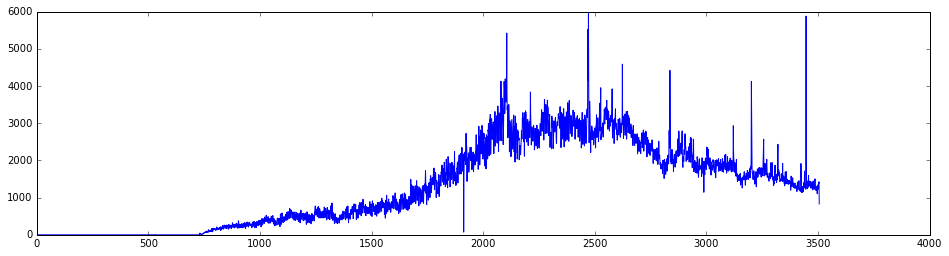

In [6]:
plt.figure(figsize=(16,4))
plt.plot(data[47])

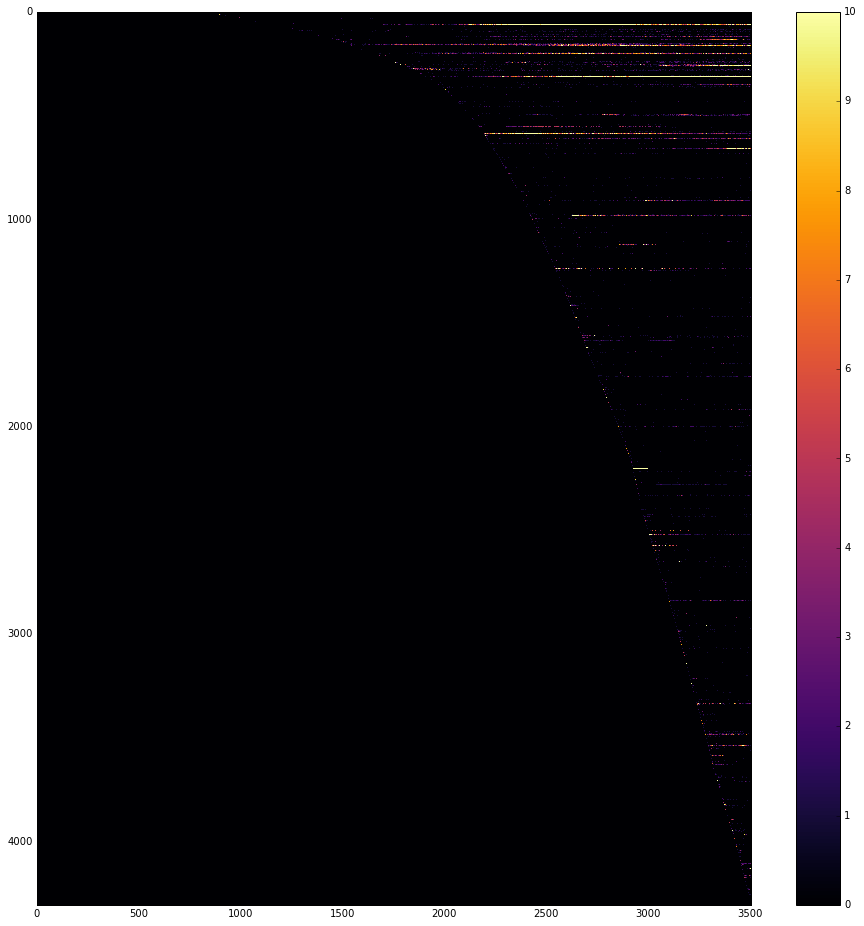

CPU times: user 1.5 s, sys: 184 ms, total: 1.69 s
Wall time: 1.71 s


In [7]:
%%time
plt.figure(figsize=(16,16))
plt.imshow(data[::100], aspect='auto', interpolation='nearest', cmap='inferno', vmax=10)
plt.colorbar()
plt.show()

## Correlation matrix

In [8]:
%%time
corrs = np.corrcoef(data[::100])

CPU times: user 7.75 s, sys: 44 ms, total: 7.79 s
Wall time: 4.19 s


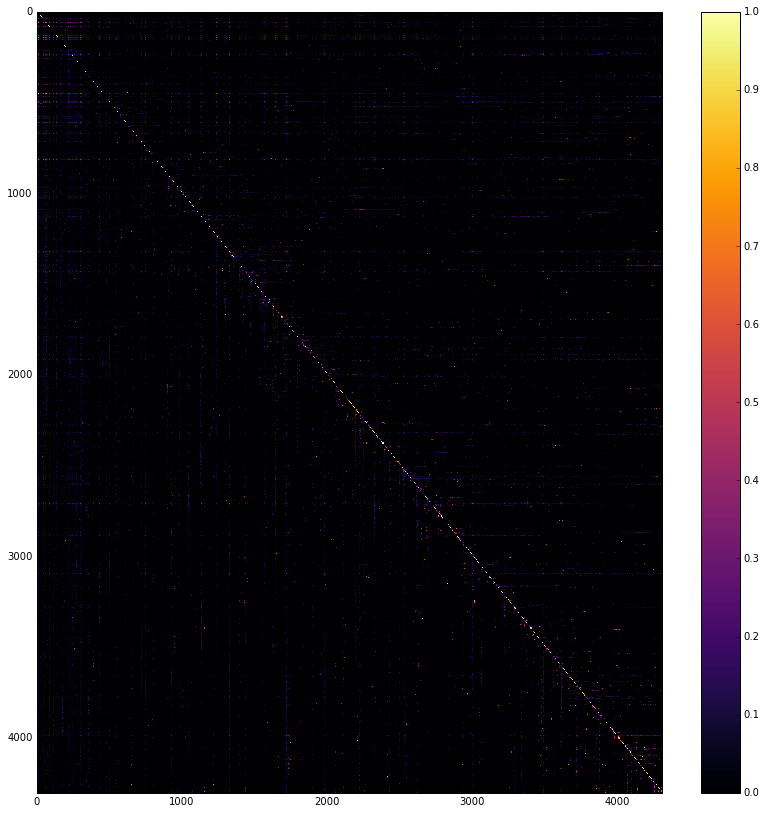

In [9]:
plt.figure(figsize=(14,14))
plt.imshow(corrs, vmin=0, vmax=1, aspect='auto', interpolation='nearest', cmap='inferno')
plt.colorbar()
plt.show()

# save frames

In [23]:
data = np.insert(data, 0, 0, axis=0)

In [29]:
i=598
while not len(data)%i==0:
    i+=1
print i
print len(data)/i

721
597.0


In [31]:
import tifffile

In [32]:
for i in range(data.shape[1]):
    frame = data[:,i]
    frame = np.reshape(frame, (597, 721))
    tifffile.imsave('frames/frame'+str(i).zfill(4)+'.tif', frame)

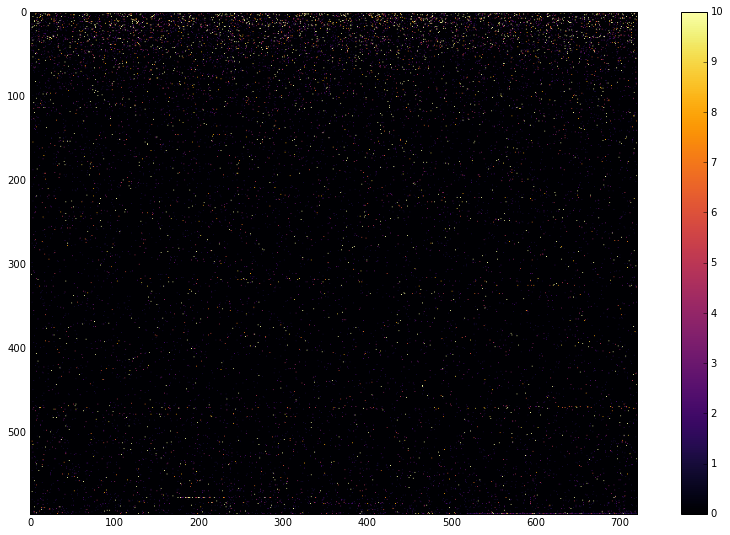

In [33]:
plt.figure(figsize=(16,9))
plt.imshow(frame, vmax=10, cmap='inferno')
plt.colorbar()

# start at center

In [94]:
i = 430434
while np.sqrt(i)%1>0:
    i+=1
print i
print i-430434

431649
1215


In [96]:
np.sqrt(431649)

657.0

In [97]:
657**2

431649

In [2]:
field = np.zeros((657,657))
spawn = [int(field.shape[0]/2), int(field.shape[1]/2)] # center

path = np.zeros((657**2, 2))
path[0] = spawn
here = spawn
wantToGo = 'right'
for i in range(1,len(path)):
    try:
        if wantToGo == 'right':
            if field[here[0]+1, here[1]] == 0:
                here[0] += 1
                wantToGo = 'down'
            else:
                here[1] -= 1
        elif wantToGo == 'down':
            if field[here[0], here[1]+1] == 0:
                here[1] += 1
                wantToGo = 'left'
            else:
                here[0] += 1
        elif wantToGo == 'left':
            if field[here[0]-1, here[1]] == 0:
                here[0] -= 1
                wantToGo = 'up'
            else:
                here[1] += 1
        elif wantToGo == 'up':
            if field[here[0], here[1]-1] == 0:
                here[1] -= 1
                wantToGo = 'right'
            else:
                here[0] -= 1

        field[here[0], here[1]] = i
        path[i] = here
    except IndexError:
        rest = np.zeros((656,2))
        rest[:,1] = range(656)
        path[i:] = rest
        break

In [158]:
i

430993

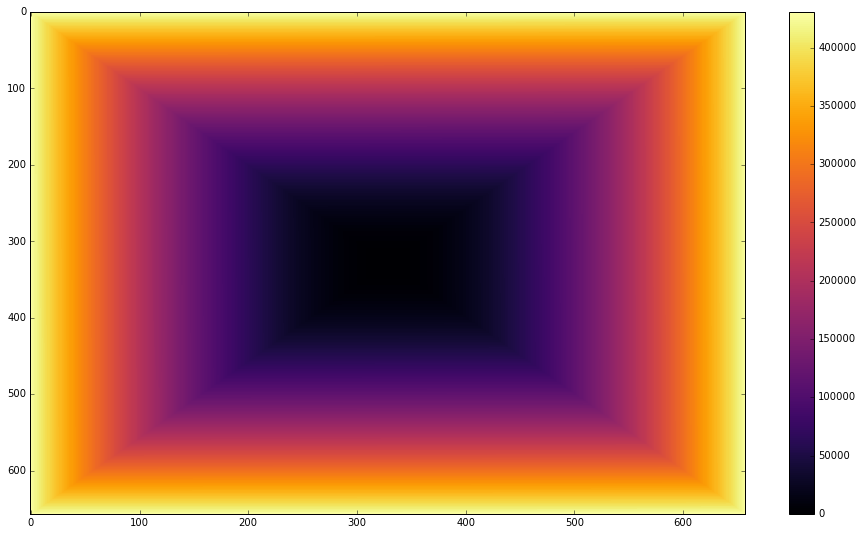

In [159]:
plt.figure(figsize=(16,9))
plt.imshow(field, cmap='inferno', aspect='auto', interpolation='nearest')
plt.colorbar()

In [4]:
data = data.astype(np.uint8)

In [5]:
data.shape

(430434, 3507)

In [11]:
mold = np.zeros((657,657,3507), dtype=np.uint8)

In [9]:
for i,p in enumerate(path[:-2]):
    mold[p[0], p[1]] = data[i]

/home/jeroen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


IndexError: index 430434 is out of bounds for axis 0 with size 430434

In [12]:
for i,d in enumerate(data):
    p = path[i]
    mold[p[0], p[1]] = d

/home/jeroen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


In [13]:
mold.shape

(657, 657, 3507)

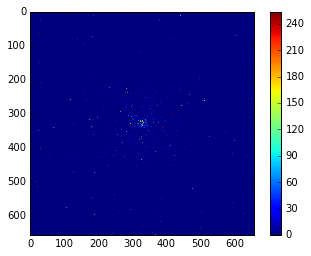

In [14]:
plt.imshow(mold[:,:,3500])
plt.colorbar()

In [15]:
import tifffile

In [17]:
for i in range(mold.shape[2]):
    frame = mold[:,:,i]
    tifffile.imsave('frames2/frame'+str(i).zfill(4)+'.tif', frame)